In [428]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time

In [515]:
train = pd.read_csv('../data/X_train.csv')
test =  pd.read_csv('../data/X_test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')#This is a file with random numbers as predictions
                                                                #dans le futur fichier résultat ne pas mettre l'index

In [434]:
train.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [436]:
train.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [468]:
train.head(260)

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,9.960940,1.491492,1.199018,-0.063145,0.595242,1.018416,1.248499,0.674080,-0.034194,-2.509908,-2.447517,-0.610936,-0.561048,255
256,10.000000,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256
257,0.000000,1.000000,0.000000,0.000000,0.000000,-0.176502,0.555739,0.000000,0.000000,-0.823498,-0.555739,0.000000,0.000000,257
258,0.039062,0.999392,0.000131,-0.031160,0.006723,-0.176326,0.555148,0.008985,-0.030279,-0.823065,-0.555279,0.022176,0.023556,258


In [851]:
train[513:513+260]#exemple trajectoire avec collision 

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
513,10.000000,-6.620778,3.202247,-0.532136,0.287855,3.322901,-1.466720,-0.899632,-0.569780,3.297877,-1.735527,1.431768,0.281925,513
514,0.000000,1.000000,0.000000,0.000000,0.000000,-0.450789,0.177112,0.000000,0.000000,-0.549211,-0.177112,0.000000,0.000000,514
515,0.039062,0.999333,0.000008,-0.034141,0.000384,-0.451961,0.171573,-0.060881,-0.286582,-0.547372,-0.171580,0.095022,0.286198,515
516,0.078125,0.997331,0.000029,-0.068445,0.000723,-0.455692,0.154201,-0.133362,-0.614370,-0.541639,-0.154230,0.201807,0.613648,516
517,0.117188,0.993982,0.000063,-0.103077,0.000973,-0.462828,0.121989,-0.241929,-1.070037,-0.531154,-0.122051,0.345006,1.069064,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,768
769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,769
770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,770
771,0.000000,1.000000,0.000000,0.000000,0.000000,-0.081487,0.726750,0.000000,0.000000,-0.918513,-0.726750,0.000000,0.000000,771


In [861]:
train[1284:1284+260]#exemple trajectoire avec collision 

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284,10.000000,0.723352,-1.444826,-0.251241,0.020408,-0.377848,0.467675,1.140102,-0.180309,-0.345504,0.977151,-0.888861,0.159901,1284
1285,0.000000,1.000000,0.000000,0.000000,0.000000,-0.471512,0.002251,0.000000,0.000000,-0.528488,-0.002251,0.000000,0.000000,1285
1286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1286
1287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1287
1288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1539
1540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1540
1541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1541
1542,0.000000,1.000000,0.000000,0.000000,0.000000,-0.080147,0.355682,0.000000,0.000000,-0.919853,-0.355682,0.000000,0.000000,1542


In [438]:
train.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [474]:
train.shape

(1285000, 14)

In [442]:
number_lines=train.shape[0]
time_interval=257
number_trajectory=number_lines/time_interval
print(f'Nombre de trajectoires : {number_trajectory}')


Nombre de trajectoires : 5000.0


In [613]:
idx = np.hstack((0,train[train.t==10].index.values+1))
idx.shape, train.t.min(), train.t.max() 

((4054,), 0.0, 10.0)

In [446]:
print(f'Nombre de trajectoires sans collision: {idx.shape[0]}')
print(f'Nombre de trajectoires avec collision: {number_trajectory-idx.shape[0]}')

Nombre de trajectoires sans collision: 4054
Nombre de trajectoires avec collision: 946.0


In [619]:
idx #donne tous les indices +1 des trajectoires qui ont fini sans collision

array([      0,     257,     514, ..., 1284486, 1284743, 1285000],
      dtype=int64)

In [593]:
train[train.t==10] #toutes les indices où une trajectoire se termine sans collision

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
256,10.0,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256
513,10.0,-6.620778,3.202247,-0.532136,0.287855,3.322901,-1.466720,-0.899632,-0.569780,3.297877,-1.735527,1.431768,0.281925,513
1027,10.0,-0.571494,-0.080697,0.179598,0.438129,0.027242,0.941225,-0.337390,-0.040624,0.544252,-0.860529,0.157792,-0.397505,1027
1284,10.0,0.723352,-1.444826,-0.251241,0.020408,-0.377848,0.467675,1.140102,-0.180309,-0.345504,0.977151,-0.888861,0.159901,1284
1798,10.0,-0.571648,1.095401,0.258019,-0.394434,0.243165,-0.222730,-0.308929,0.562921,0.328483,-0.872672,0.050909,-0.168487,1798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283971,10.0,-10.521958,1.545332,-1.056849,0.174263,5.248843,-0.664276,-0.864265,-0.033684,5.273115,-0.881057,1.921115,-0.140579,1283971
1284228,10.0,0.311324,0.118711,-0.869690,-0.581231,-0.435548,0.589852,0.531802,-0.142515,0.124224,-0.708563,0.337888,0.723746,1284228
1284485,10.0,-0.917666,-2.512581,-0.111736,-0.619204,-1.049653,-2.067444,0.035571,0.407810,1.967319,4.580025,0.076165,0.211394,1284485
1284742,10.0,-0.334211,-0.251147,-1.915656,-0.884303,-0.347886,-0.129399,2.967301,1.166792,0.682097,0.380546,-1.051645,-0.282489,1284742


In [643]:
index_begin_trajectory=np.arange(0, number_lines,time_interval)

1028

709063


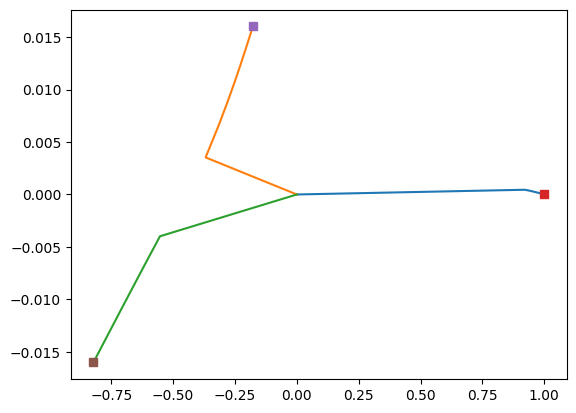

In [893]:
#visualiser une trajectoire random
k = np.random.choice(index_begin_trajectory) # exemple collision 514 1285 294008
print(k)
pltidx=range(k,k+257)#k+257 exclus
pltsquare = k
plt.plot(train.x_1[pltidx],train.y_1[pltidx])
plt.plot(train.x_2[pltidx],train.y_2[pltidx])
plt.plot(train.x_3[pltidx],train.y_3[pltidx])

plt.plot(train.x_1[pltsquare],train.y_1[pltsquare],'s')
plt.plot(train.x_2[pltsquare],train.y_2[pltsquare],'s')
plt.plot(train.x_3[pltsquare],train.y_3[pltsquare],'s')

In [841]:
train.iloc[257*6-1] #afficher une ligne

t           0.0
x_1         0.0
y_1         0.0
v_x_1       0.0
v_y_1       0.0
x_2         0.0
y_2         0.0
v_x_2       0.0
v_y_2       0.0
x_3         0.0
y_3         0.0
v_x_3       0.0
v_y_3       0.0
Id       1541.0
Name: 1541, dtype: float64

In [488]:
test.head(260)

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
0,0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
...,...,...,...,...,...,...,...,...
255,255,9.960940,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
256,256,10.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
257,257,0.000000,1.0,0.0,-0.061346,0.886386,-0.938654,-0.886386
258,258,0.039062,1.0,0.0,-0.061346,0.886386,-0.938654,-0.886386


In [470]:
test.columns,

(Index(['Id', 't', 'x0_1', 'y0_1', 'x0_2', 'y0_2', 'x0_3', 'y0_3'], dtype='object'),)

In [472]:
test.shape

(1041621, 8)

In [490]:
print(f"Nombre de points initiaux : {test.shape[0] // 257}")

Nombre de points initiaux : 4053


In [505]:
sample_submission.head(260)

,Id,x_1,y_1,x_2,y_2,x_3,y_3
0,0,-0.228877,-0.194306,-1.878604,-1.521913,0.255095,0.256084
1,1,1.566288,0.698060,0.038057,-0.569932,1.289377,-0.277511
2,2,0.191759,-0.911416,1.431736,-0.143101,-0.598665,-2.431377
3,3,0.460689,0.750665,1.010594,1.475047,0.307952,-0.784848
4,4,-0.560213,-0.261105,0.432813,1.326952,0.481754,-0.997106
...,...,...,...,...,...,...,...
255,255,-0.605577,0.043700,0.583765,-0.214975,-1.961186,0.795273
256,256,0.387436,-0.711031,0.461278,-0.728386,0.749362,-0.109080
257,257,-1.338486,-0.911780,-0.264529,-1.703823,-0.943546,-0.252946
258,258,0.742359,-0.317296,1.553284,-0.684047,2.229963,-0.877820


In [496]:
sample_submission.shape

(1041621, 7)

In [549]:
def train_test_split(df, train_size=0.8, validation_size=0.2, method="random"):
    if method == "random":
            
        n_traj = len(df) // 257  # nombre total de trajectoires
        traj_indices = np.arange(n_traj)
    
        np.random.shuffle(traj_indices)
    
        n_train = int(train_size * n_traj)
        n_val = int(validation_size * n_traj)
    
        if n_train + n_val > n_traj:
            raise ValueError("train_size + validation_size dépasse 1.0")
    
        train_traj_indices = traj_indices[:n_train]
        val_traj_indices = traj_indices[n_train:n_train+n_val]
    
        train_split = pd.concat([df.iloc[i*traj_size:(i+1)*traj_size] for i in train_traj_indices])
        validation_split = pd.concat([df.iloc[i*traj_size:(i+1)*traj_size] for i in val_traj_indices])
    
        return train_split, validation_split

In [551]:
train_test_split(train)[0].shape

(1028000, 14)

In [553]:
train_test_split(train)[1].shape

(257000, 14)

In [555]:
train_test_split(train)[0].head(260)

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
774341,0.000000,1.000000,0.000000,0.000000,0.000000,-0.102624,0.988996,0.000000,0.000000,-0.897376,-0.988996,0.000000,0.000000,774341
774342,0.039062,0.999593,0.000155,-0.020827,0.007948,-0.102428,0.988608,0.010054,-0.019871,-0.897166,-0.988763,0.010773,0.011923,774342
774343,0.078125,0.998372,0.000621,-0.041690,0.015917,-0.101838,0.987443,0.020131,-0.039776,-0.896534,-0.988065,0.021559,0.023859,774343
774344,0.117188,0.996335,0.001399,-0.062627,0.023926,-0.100854,0.985500,0.030257,-0.059750,-0.895481,-0.986899,0.032370,0.035824,774344
774345,0.156250,0.993478,0.002491,-0.083676,0.031997,-0.099473,0.982774,0.040456,-0.079827,-0.894005,-0.985265,0.043220,0.047830,774345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774596
774597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774597
1214068,0.000000,1.000000,0.000000,0.000000,0.000000,-0.344156,0.012910,0.000000,0.000000,-0.655844,-0.012910,0.000000,0.000000,1214068
1214069,0.039062,0.999300,0.000002,-0.035842,0.000093,-0.351641,0.012251,-0.390314,-0.034313,-0.647659,-0.012253,0.426156,0.034220,1214069


In [557]:
train_test_split(train)[1].head(260)

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
62194,0.000000,1.000000,0.000000,0.000000,0.000000,-0.465670,0.569217,0.000000,0.000000,-0.534330,-0.569217,0.000000,0.000000,62194
62195,0.039062,0.999445,0.000013,-0.028417,0.000647,-0.465418,0.568519,0.012926,-0.035722,-0.534028,-0.568532,0.015491,0.035075,62195
62196,0.078125,0.997779,0.000051,-0.056911,0.001295,-0.464660,0.566424,0.025882,-0.071598,-0.533119,-0.566474,0.031029,0.070304,62196
62197,0.117188,0.994997,0.000114,-0.085561,0.001943,-0.463395,0.562921,0.038899,-0.107786,-0.531602,-0.563035,0.046662,0.105843,62197
62198,0.156250,0.991091,0.000202,-0.114449,0.002593,-0.461620,0.557997,0.052007,-0.144452,-0.529472,-0.558199,0.062442,0.141859,62198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62449,9.960940,0.408212,0.500435,0.495800,-0.243798,0.007755,-0.767221,0.371114,-0.158027,-0.415966,0.266787,-0.866914,0.401825,62449
62450,10.000000,0.426477,0.490239,0.440059,-0.277677,0.022150,-0.772432,0.365923,-0.109102,-0.448626,0.282193,-0.805981,0.386779,62450
162424,0.000000,1.000000,0.000000,0.000000,0.000000,-0.284397,0.779177,0.000000,0.000000,-0.715603,-0.779177,0.000000,0.000000,162424
162425,0.039062,0.999515,0.000086,-0.024825,0.004430,-0.284186,0.778721,0.010818,-0.023386,-0.715330,-0.778807,0.014007,0.018956,162425


In [697]:
def get_index_initial_point(id, idx=index_begin_trajectory):
    initial_idx = max(i for i in idx if i <= id)
    return initial_idx

In [843]:
get_index_initial_point(257*6-1)

1285